### MNIST em uma rede convolucional implementada em PyTorch

In [2]:
import torch

In [3]:
# Configuração placa de video
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [9]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

In [10]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [11]:
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [13]:
print(train_data.data.size())

torch.Size([60000, 28, 28])


In [14]:
print(train_data.targets.size())

torch.Size([60000])


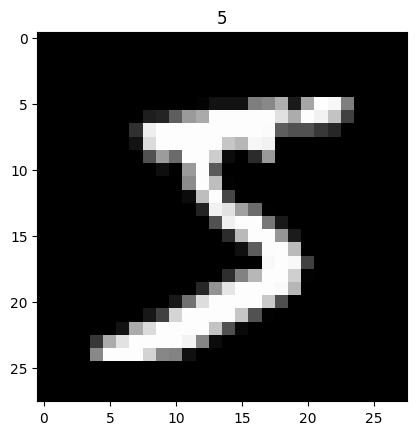

In [17]:
import matplotlib.pyplot as plt

plt.imshow(train_data.data[0], cmap = 'gray')
plt.title('%i' % train_data.targets[0])
plt.show()

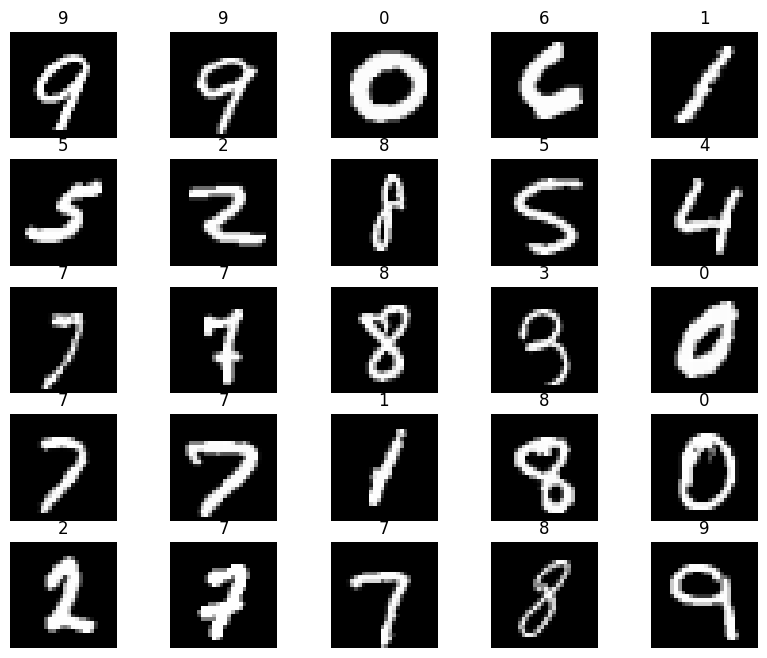

In [19]:
figure = plt.figure(figsize = (10,8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size = (1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap = "gray")
plt.show()
    

In [20]:
from torch.utils.data import DataLoader

loaders = {
    'train' : DataLoader(train_data,
                         batch_size = 100,
                         shuffle = True,
                         num_workers = 1),
    'test' : DataLoader(test_data,
                        batch_size = 100,
                        shuffle = True,
                        num_workers = 1)
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x13bd8bea020>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x13bd8be9e70>}

In [57]:
# Construindo o modelo do rede convolucional
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels = 1,
                out_channels = 16,
                kernel_size = 5,
                stride = 1,
                padding = 2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        
        #camada densa, saida para 10 classe
        self.out = nn.Linear(32 * 7 * 7, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        
        #flatten the output of conv2 to (batch_size, 32*7*7)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x #retorna x para visuzalização

In [58]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [59]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [60]:
from torch import optim

optimizer = optim.Adam(cnn.parameters(), lr = 0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [62]:
from torch.autograd import Variable

num_epochs = 10

def train(num_epochs, cnn, loaders):
    cnn.train()
    
    # treinando o modelo
    total_step = len(loaders['train'])
    
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            # dado os dados do lote, normalizar x quando itera train_loader
            b_x = Variable(images)
            b_y = Variable(labels)

            output = cnn(b_x)[0]
            loss = loss_func(output, b_y)
            
            #limpando gradiente para esta etapa de treinamento
            optimizer.zero_grad()
            
            #computando a retropropagação
            loss.backward()
            
            #aplicando os gradientes
            optimizer.step()
            
            if(i+1) % 100 == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))
                
                pass
            
        pass
        
    pass

train(num_epochs, cnn, loaders)
    

Epoch [1/10], Step [100/600], Los: 0.075328
Epoch [1/10], Step [200/600], Los: 0.022712
Epoch [1/10], Step [300/600], Los: 0.029790
Epoch [1/10], Step [400/600], Los: 0.190093
Epoch [1/10], Step [500/600], Los: 0.079823
Epoch [1/10], Step [600/600], Los: 0.147857
Epoch [2/10], Step [100/600], Los: 0.102695
Epoch [2/10], Step [200/600], Los: 0.070396
Epoch [2/10], Step [300/600], Los: 0.124606
Epoch [2/10], Step [400/600], Los: 0.074734
Epoch [2/10], Step [500/600], Los: 0.087204
Epoch [2/10], Step [600/600], Los: 0.122858
Epoch [3/10], Step [100/600], Los: 0.025452
Epoch [3/10], Step [200/600], Los: 0.012264
Epoch [3/10], Step [300/600], Los: 0.106317
Epoch [3/10], Step [400/600], Los: 0.032495
Epoch [3/10], Step [500/600], Los: 0.004194
Epoch [3/10], Step [600/600], Los: 0.014498
Epoch [4/10], Step [100/600], Los: 0.021264
Epoch [4/10], Step [200/600], Los: 0.067195
Epoch [4/10], Step [300/600], Los: 0.040086
Epoch [4/10], Step [400/600], Los: 0.027869
Epoch [4/10], Step [500/600], Lo

In [ ]:
def test():
    #Testando o modelo
    cnn.eval()
    
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['tests']:
            test_output, last_layer = cnn(images)
            pred_y, torch.max(test_output, 1)[1],data,squeeze()
            accuracy = (pred_y == labels).sum()item() / float(labels.size(0))
            pass
    
    print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)
    pass

test()